<a href="https://colab.research.google.com/github/LiamDuero03/DS-Society-Project/blob/main/Extra ML Material/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks: Mimicking Biological Logic
Neural Networks (Deep Learning) consist of layers of "neurons" that pass signals to one another. Unlike previous models, NNs can learn nearly **any** mathematical function by adjusting weights through a process called **Backpropagation**.


* **Input Layer:** Receives the features.
* **Hidden Layers:** Perform non-linear transformations using **Activation Functions** (like ReLU).
* **Output Layer:** Provides the final prediction.

## 1. Generating High-Complexity Synthetic Data
Neural Networks are "data hungry." To make a Neural Network worth using, we need a problem that is too complex for simple linear models to solve.

We will generate **2,000 samples** with three features ($x_1, x_2, x_3$) and a target ($y$) that follows a non-linear "saddle" function:
$$y = x_1^2 - x_2^2 + \sin(x_3) + \text{noise}$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate 2,000 samples (NNs need more data)
np.random.seed(42)
n_samples = 2000
X = np.random.uniform(-5, 5, (n_samples, 3))

# Target: A complex interaction of the features
# y = x1^2 - x2^2 + sin(x3) + noise
y = X[:, 0]**2 - X[:, 1]**2 + np.sin(X[:, 2]) + np.random.normal(0, 0.5, n_samples)


## 2. Feature Scaling & Data Splitting

### The Importance of Scaling
Neural Networks learn by adjusting "weights" through **Gradient Descent**. If your features have different ranges, the gradients can become unstable, causing the model to take forever to learn or even fail entirely.



We use `StandardScaler` to transform our data so that:
* **Mean = 0**
* **Standard Deviation = 1**

This creates a "level playing field" for all input features.

In [2]:
# Neural Networks are sensitive to scale!
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

## 3. Building the Neural Network (The "Brain")

We are using a **Sequential** model, which means our data flows in one direction through a series of layers.


#### The Layers:
1. **Input Layer:** Designed to receive our 3 features ($x_1, x_2, x_3$).
2. **Hidden Layer 1 (64 Neurons):** Uses the **ReLU** activation function. This is the "magic" that allows the network to learn non-linear patterns like our saddle shape.
3. **Hidden Layer 2 (32 Neurons):** A second layer to refine the patterns identified in the first layer.
4. **Output Layer (1 Neuron):** Since this is a **Regression** task (predicting a number), the final layer has a single neuron with no activation function.

#### Activation Functions: ReLU
We use **ReLU** (Rectified Linear Unit) because it is computationally efficient and helps prevent the "vanishing gradient" problem, allowing deeper networks to learn faster.


In [3]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),
    Dense(32, activation='relu'),
    Dense(1) # Final output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Training: The Learning Process
Now we "fit" the model to our data. Unlike simpler models that solve in one go, Neural Networks learn iteratively over several passes.



* **Epochs (50):** The number of times the model will see the entire training dataset.
* **Batch Size (32):** The model doesn't look at all 1,600 training points at once; it looks at 32 at a time, updates its weights, and moves on. This makes training faster and more stable.
* **Validation Split (0.2):** We hold back 20% of the training data as a "mini-test" during each epoch. This helps us see if the model is learning general patterns or just memorizing the training data (**Overfitting**).

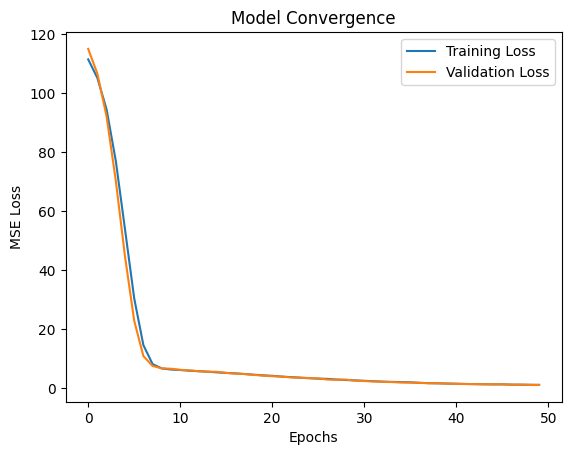

In [4]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=0 # Keep the notebook clean
)

# Plotting the Learning Curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Convergence')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

## 7. Evaluating the Neural Network
Now that the training is complete, we put our model to the test. We use the **Test Set** (data the model has never seen) to calculate our final performance metrics.



* **R-squared ($R^2$):** Tells us how much of the complex "saddle" shape variance the model captured. For this non-linear data, a high $R^2$ demonstrates that the hidden layers successfully learned the mathematical interactions between $x_1, x_2$, and $x_3$.
* **MAE (Mean Absolute Error):** Represents the average physical distance between our model's predictions and the actual values.

In [5]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
nn_r2 = r2_score(y_test, y_pred)
nn_mae = np.mean(np.abs(y_test - y_pred.flatten()))

print(f"--- Neural Network Performance ---")
print(f"R-squared (R²): {nn_r2:.4f}")
print(f"Mean Absolute Error (MAE): {nn_mae:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
--- Neural Network Performance ---
R-squared (R²): 0.9901
Mean Absolute Error (MAE): 0.8774


## 8. Analyzing the Results: The Power of Deep Learning

An **$R^2$ of 0.99** indicates that the model has captured 99% of the variance in our complex dataset. This is a significant jump compared to what a linear model would achieve on the same data.

* **High Precision:** An MAE of **0.87** relative to the range of our target variable shows that the "neurons" have successfully approximated the non-linear saddle function.
* **Generalization:** Since our **Validation Loss** and **Test Metrics** are both strong, we know the model didn't just "memorize" the training points (overfitting)—it actually learned the underlying physics of the data.



### Final Verdict: Neural Networks
While the performance is the highest we've seen, it's important to remember the "cost" of this accuracy:

| Factor | Observation |
| :--- | :--- |
| **Compute Power** | This model required 50 iterations (epochs) to reach this result. |
| **Data Scaling** | Without the `StandardScaler`, this model would likely have failed. |
| **Interpretability** | We know the model is accurate, but we can't "read" the weights like a simple slope in Linear Regression. |